Segmento 1: [1, 2.9079219611941243, 0.0, -0.9079219611941244] para x en (0,1)
1.0 + 2.9079219611941243·x¹ + 0.0·x² - 0.9079219611941244·x³
Segmento 2: [3, 0.184156077611751, -2.7237658835823733, 5.539609805970621] para x en (1,2)
3.0 + 0.184156077611751·x¹ - 2.7237658835823733·x² + 5.539609805970621·x³
Segmento 3: [6, 11.35545372835887, 13.895063534329493, -6.250517262688365] para x en (2,3)
6.0 + 11.35545372835887·x¹ + 13.895063534329493·x² - 6.250517262688365·x³
Segmento 4: [25, 20.39402900895276, -4.856488253735602, 32.46245924478284] para x en (3,4)
25.0 + 20.39402900895276·x¹ - 4.856488253735602·x² + 32.46245924478284·x³
Segmento 5: [73, 108.0684302358301, 92.53088948061293, -51.59931971644303] para x en (4,5)
73.0 + 108.0684302358301·x¹ + 92.53088948061293·x² - 51.59931971644303·x³
Segmento 6: [222, 138.3322500477269, -62.26706966871615, -4.065180379010741] para x en (5,6)
222.0 + 138.3322500477269·x¹ - 62.26706966871615·x² - 4.065180379010741·x³
Segmento 7: [294, 1.6025695732623

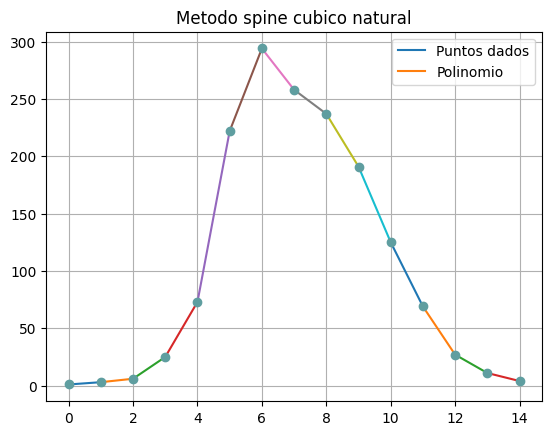

In [91]:
from numpy.lib import polynomial
import numpy as np
from numpy.polynomial.polynomial import Polynomial
#MARTINEZ PEREA EMILLI ASHLEY
import matplotlib . pyplot as plt

def cubico_natural(x, y):
    n = len(x)
    h = np.zeros(n)
    mu = np.zeros(n-1)
    l = np.zeros(n)
    z = np.zeros(n)
    alpha= np.zeros(n)

    # Paso 1: Calcular las diferencias
    for i in range(n-1):
        h[i] = x[i+1]-x[i]

    for i in range (1,n-1):
        alpha[i] = 3 * (y[i+1] - y[i]) / h[i] - 3 * (y[i] - y[i-1]) / h[i-1]
    # Paso 2: Resolver el sistema de ecuaciones
    l[0]=1
    mu[0]=0
    z[0]=0

    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - (h[i-1] * mu[i-1])
        mu[i]=h[i]/l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # Paso 3: Calcular los coeficientes
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    l[3]=1
    c[3]=0

    for j in range(13,-1,-1):
       c[j] = z[j] - mu[j] * c[j+1]
       b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2*c[j]) / 3
       d[j] = (c[j+1] - c[j]) / (3 * h[j])


    # Paso 4: Devolver los coeficientes del spline cúbico
    coeficientes = []
    for i in range(n-1):
        coef = [y[i], b[i], c[i], d[i]]
        coeficientes.append(coef)

    return coeficientes

# Ejemplo de uso
x = np.array([0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14])
y = np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])

coeficientes = cubico_natural(x, y)

# Imprimir los coeficientes del spline cúbico
for i, coeff in enumerate(coeficientes):
    print(f"Segmento {i + 1}: {coeff} para x en ({x[i]},{x[i+1]})")
    polis=Polynomial(coef=coeficientes[i])
    print(polis)
    h=np.linspace(start=i,stop=i+1,num=2)
    plt.plot(h,polis(h-i))

plt.plot(x,y,'o',color='cadetblue')
plt.title('Metodo spine cubico natural')
plt.legend(['Puntos dados', 'Polinomio'])
plt.grid(True)
plt.show()
